In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
y1 = pd.read_csv('../data/TrueFX/EUR-USD/datos_procesados_5T_EURUSD-2018-01.csv', index_col=0,
               infer_datetime_format=True, parse_dates=True)

y_2 = pd.read_csv('../data/TrueFX/GBP-USD/datos_procesados_5T_GBPUSD-2018-01.csv', index_col=0,
               infer_datetime_format=True, parse_dates=True)

In [3]:
%run ../code/EUtilities.py
EU = EUtilities()

ValueError: x and y must be the same size

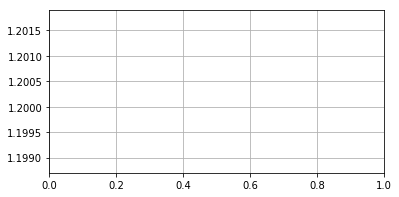

In [4]:
x = np.arange(len(y1))
plt.figure(figsize=(6,3))
plt.grid()
plt.ylim(1.1987,1.2019)
plt.scatter(x[:-1],y1[:-1], color='blue', label='window EUR/USD');
plt.scatter(x[:-1],y2[:-1], color='red', label='window CAD/USD');
plt.scatter(x[-1],y1[-1], color='orange', label='target EUR/USD');
plt.legend();
plt.savefig('figure9-1.png')

### Mejores resultados machine learning

In [5]:
r_GNB = pd.read_csv('../resultados/TrueFX/EUR-USD/GaussianNB/pnl_5T_weights_GNB_NC4_OHLC_wsize7_2018-01.csv',
                   index_col=0, infer_datetime_format=True, parse_dates=True)

In [6]:
r_GNB.index

DatetimeIndex(['2018-01-08', '2018-01-09', '2018-01-10', '2018-01-11',
               '2018-01-12', '2018-01-15', '2018-01-16', '2018-01-17',
               '2018-01-18', '2018-01-19', '2018-01-22', '2018-01-23',
               '2018-01-24', '2018-01-25', '2018-01-26', '2018-01-29',
               '2018-01-30', '2018-01-31', '2018-02-01'],
              dtype='datetime64[ns]', freq=None)

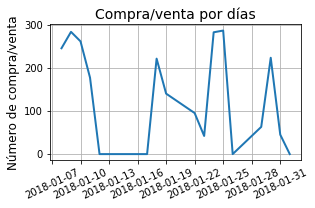

In [11]:
plt.figure(figsize=(4.5,2.5))
plt.title('Compra/venta por días',size=14)
plt.ylabel('Número de compra/venta', size=12)
plt.plot(r_GNB.index,r_GNB.buys,linewidth=2)
plt.grid()
plt.xticks(rotation=25);
plt.savefig('figure11-1_1.png',bbox_inches='tight')

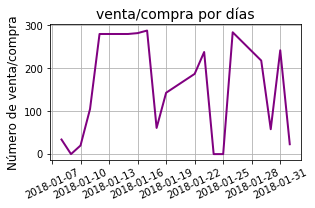

In [12]:
plt.figure(figsize=(4.5,2.5))
plt.title('venta/compra por días',size=14)
plt.ylabel('Número de venta/compra', size=12)
plt.plot(r_GNB.index,r_GNB.sells,linewidth=2, color='purple')
plt.grid()
plt.xticks(rotation=25);
plt.savefig('figure11-1_2.png',bbox_inches='tight')

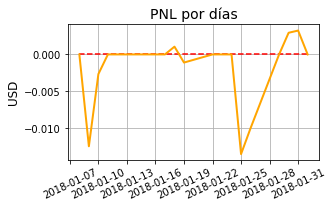

In [13]:
plt.figure(figsize=(4.5,2.5))
plt.title('PNL por días',size=14)
plt.ylabel('USD', size=12)
plt.plot(r_GNB.index,np.zeros(len(r_GNB.PNL)),linewidth=1.5, color='red', linestyle='--')
plt.plot(r_GNB.index,r_GNB.PNL,linewidth=2, color='orange')
plt.grid()
plt.xticks(rotation=25);
plt.savefig('figure11-1_3.png',bbox_inches='tight')

In [14]:
#para pintar el PNL que se va acumulando
PNL_accu_GNB = []
count_GNB = 0
for i in r_GNB.PNL:
    count_GNB += i
    PNL_accu_GNB.append(count_GNB)

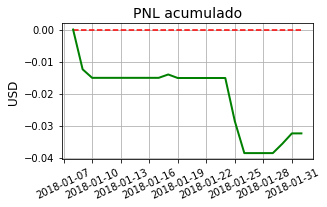

In [15]:
plt.figure(figsize=(4.5,2.5))
plt.title('PNL acumulado',size=14)
plt.ylabel('USD', size=12)
plt.plot(r_GNB.index,np.zeros(len(r_GNB.PNL)),linewidth=1.5, color='red', linestyle='--')
plt.plot(r_GNB.index,PNL_accu_GNB,linewidth=2, color='green')
plt.grid()
plt.xticks(rotation=25);
plt.savefig('figure11-1_4.png',bbox_inches='tight')

### Ahora para el KNC

In [16]:
r_KNC = pd.read_csv('../resultados/TrueFX/EUR-USD/KNeighborsClassfier/pnl_5T_weights_KNC_NC4_OHLC_wsize7_2018-01.csv',
                   index_col=0, infer_datetime_format=True, parse_dates=True)

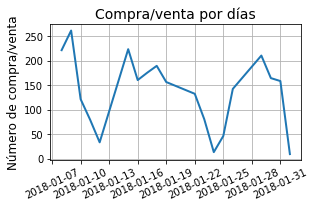

In [17]:
plt.figure(figsize=(4.5,2.5))
plt.title('Compra/venta por días',size=14)
plt.ylabel('Número de compra/venta', size=12)
plt.plot(r_KNC.index,r_KNC.buys,linewidth=2)
plt.grid()
plt.xticks(rotation=25);
plt.savefig('figure11-2_1.png',bbox_inches='tight')

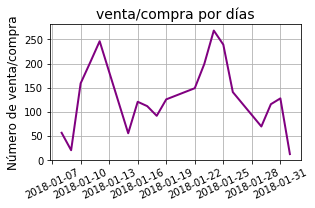

In [18]:
plt.figure(figsize=(4.5,2.5))
plt.title('venta/compra por días',size=14)
plt.ylabel('Número de venta/compra', size=12)
plt.plot(r_KNC.index,r_KNC.sells,linewidth=2, color='purple')
plt.grid()
plt.xticks(rotation=25);
plt.savefig('figure11-2_2.png',bbox_inches='tight')

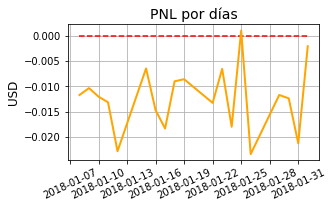

In [19]:
plt.figure(figsize=(4.5,2.5))
plt.title('PNL por días',size=14)
plt.ylabel('USD', size=12)
plt.plot(r_KNC.index,np.zeros(len(r_KNC.PNL)),linewidth=1.5, color='red', linestyle='--')
plt.plot(r_KNC.index,r_KNC.PNL,linewidth=2, color='orange')
plt.grid()
plt.xticks(rotation=25);
plt.savefig('figure11-2_3.png',bbox_inches='tight')

In [20]:
PNL_accu_KNC = []
count_KNC = 0
for i in r_KNC.PNL:
    count_KNC += i
    PNL_accu_KNC.append(count_KNC)

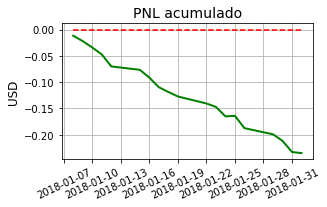

In [22]:
plt.figure(figsize=(4.5,2.5))
plt.title('PNL acumulado',size=14)
plt.ylabel('USD', size=12)
plt.plot(r_KNC.index,np.zeros(len(r_KNC.PNL)),linewidth=1.5, color='red', linestyle='--')
plt.plot(r_KNC.index,PNL_accu_KNC,linewidth=2, color='green')
plt.grid()
plt.xticks(rotation=25);
plt.savefig('figure11-2_4.png',bbox_inches='tight')

### Ahora se prueba con DTC

In [23]:
r_DTC = pd.read_csv('../resultados/TrueFX/EUR-USD/DecisionTreeClassifier/pnl_5T_weights_DTC_NC4_OHLC_wsize7_2018-01.csv',
                   index_col=0, infer_datetime_format=True, parse_dates=True)

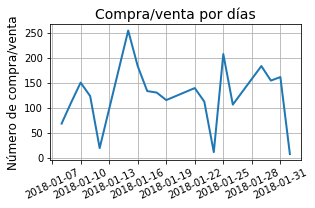

In [25]:
plt.figure(figsize=(4.5,2.5))
plt.title('Compra/venta por días',size=14)
plt.ylabel('Número de compra/venta', size=12)
plt.plot(r_DTC.index,r_DTC.buys,linewidth=2)
plt.grid()
plt.xticks(rotation=25);
plt.savefig('figure11-3_1.png',bbox_inches='tight')

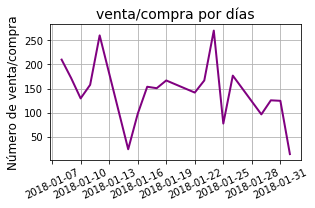

In [26]:
plt.figure(figsize=(4.5,2.5))
plt.title('venta/compra por días',size=14)
plt.ylabel('Número de venta/compra', size=12)
plt.plot(r_DTC.index,r_DTC.sells,linewidth=2, color='purple')
plt.grid()
plt.xticks(rotation=25);
plt.savefig('figure11-3_2.png',bbox_inches='tight')

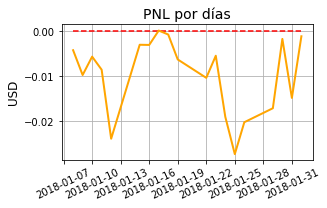

In [27]:
plt.figure(figsize=(4.5,2.5))
plt.title('PNL por días',size=14)
plt.ylabel('USD', size=12)
plt.plot(r_DTC.index,np.zeros(len(r_DTC.PNL)),linewidth=1.5, color='red', linestyle='--')
plt.plot(r_DTC.index,r_DTC.PNL,linewidth=2, color='orange')
plt.grid()
plt.xticks(rotation=25);
plt.savefig('figure11-3_3.png',bbox_inches='tight')

In [28]:
PNL_accu_DTC = []
count_DTC = 0
for i in r_DTC.PNL:
    count_DTC += i
    PNL_accu_DTC.append(count_DTC)

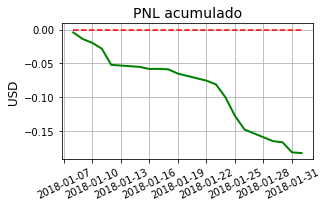

In [29]:
plt.figure(figsize=(4.5,2.5))
plt.title('PNL acumulado',size=14)
plt.ylabel('USD', size=12)
plt.plot(r_DTC.index,np.zeros(len(r_DTC.PNL)),linewidth=1.5, color='red', linestyle='--')
plt.plot(r_DTC.index,PNL_accu_DTC,linewidth=2, color='green')
plt.grid()
plt.xticks(rotation=25);
plt.savefig('figure11-3_4.png',bbox_inches='tight')

### Ahora probamos el RFC

In [30]:
r_RFC = pd.read_csv('../resultados/TrueFX/EUR-USD/RandomForestClassifier/pnl_5T_weights_RFC_NC4_OHLC_wsize7_2018-01.csv',
                   index_col=0, infer_datetime_format=True, parse_dates=True)

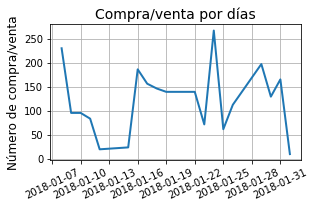

In [31]:
plt.figure(figsize=(4.5,2.5))
plt.title('Compra/venta por días',size=14)
plt.ylabel('Número de compra/venta', size=12)
plt.plot(r_RFC.index,r_RFC.buys,linewidth=2)
plt.grid()
plt.xticks(rotation=25);
plt.savefig('figure11-4_1.png',bbox_inches='tight')

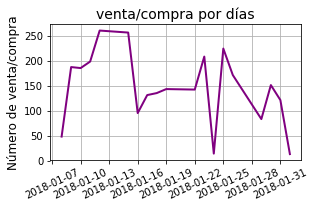

In [32]:
plt.figure(figsize=(4.5,2.5))
plt.title('venta/compra por días',size=14)
plt.ylabel('Número de venta/compra', size=12)
plt.plot(r_RFC.index,r_RFC.sells,linewidth=2, color='purple')
plt.grid()
plt.xticks(rotation=25);
plt.savefig('figure11-4_2.png',bbox_inches='tight')

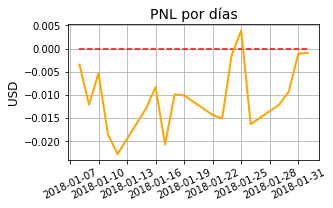

In [33]:
plt.figure(figsize=(4.5,2.5))
plt.title('PNL por días',size=14)
plt.ylabel('USD', size=12)
plt.plot(r_RFC.index,np.zeros(len(r_DTC.PNL)),linewidth=1.5, color='red', linestyle='--')
plt.plot(r_RFC.index,r_RFC.PNL,linewidth=2, color='orange')
plt.grid()
plt.xticks(rotation=25);
plt.savefig('figure11-4_3.png',bbox_inches='tight')

In [34]:
PNL_accu_RFC = []
count_RFC = 0
for i in r_RFC.PNL:
    count_RFC += i
    PNL_accu_RFC.append(count_RFC)

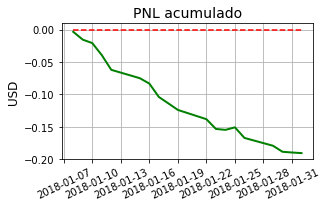

In [35]:
plt.figure(figsize=(4.5,2.5))
plt.title('PNL acumulado',size=14)
plt.ylabel('USD', size=12)
plt.plot(r_RFC.index,np.zeros(len(r_RFC.PNL)),linewidth=1.5, color='red', linestyle='--')
plt.plot(r_RFC.index,PNL_accu_RFC,linewidth=2, color='green')
plt.grid()
plt.xticks(rotation=25);
plt.savefig('figure11-4_4.png',bbox_inches='tight')

### Se mira el conjunto de los PNL de los distintos modelos

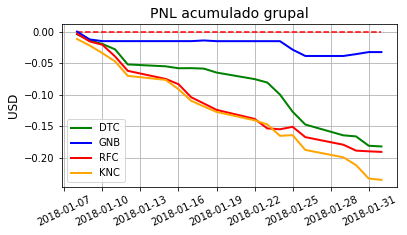

In [36]:
plt.figure(figsize=(6,3))
plt.title('PNL acumulado grupal',size=14)
plt.ylabel('USD', size=12)
plt.plot(r_DTC.index,np.zeros(len(r_DTC.PNL)),linewidth=1.5, color='red', linestyle='--')
plt.plot(r_DTC.index,PNL_accu_DTC,linewidth=2, color='green', label='DTC')
plt.plot(r_DTC.index,PNL_accu_GNB,linewidth=2, color='blue', label='GNB')
plt.plot(r_DTC.index,PNL_accu_RFC,linewidth=2, color='red', label='RFC')
plt.plot(r_DTC.index,PNL_accu_KNC,linewidth=2, color='orange', label='KNC')
plt.grid()
plt.legend()
plt.xticks(rotation=25);
plt.savefig('figure11-grupal.png',bbox_inches='tight')

### Se mira en conjunto el PNL diario

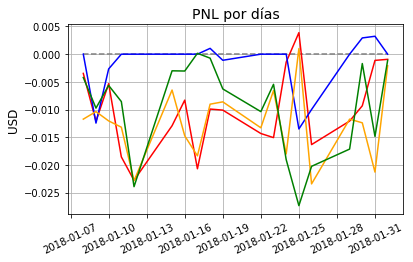

In [37]:
plt.figure(figsize=(6,3.5))
plt.title('PNL por días',size=14)
plt.ylabel('USD', size=12)
plt.plot(r_RFC.index,np.zeros(len(r_DTC.PNL)),linewidth=1.5, color='grey', linestyle='--')
plt.plot(r_RFC.index,r_RFC.PNL,linewidth=1.5, color='red')
plt.plot(r_RFC.index,r_GNB.PNL,linewidth=1.5, color='blue')
plt.plot(r_RFC.index,r_KNC.PNL,linewidth=1.5, color='orange')
plt.plot(r_RFC.index,r_DTC.PNL,linewidth=1.5, color='green')
plt.grid()
plt.xticks(rotation=25);

### Ahora probamos con los datos de las RNN

#### Diseño A

In [38]:
D_1 = pd.read_csv('../TrueFX EUR vs USD/RNN/resultados/result_1.csv',index_col=0, infer_datetime_format=True,
                 parse_dates=True)
D_1.head()

,PNL,buy,sell,longest_buy,longest_sell,accuracy 1,accuracy 0,accuracy 3,accuracy 2,acuracy_total
2017-06-06,0.000380,1.0,1.0,1.0,150.0,0.008850,0.010989,0.027778,1.000000,0.156584
2017-06-07,0.006399,65.0,12.0,43.0,85.0,0.305556,0.011111,0.750000,0.170732,0.254480
2017-06-08,-0.013865,249.0,0.0,115.0,6.0,0.899083,0.000000,0.296296,0.000000,0.374558
2017-06-09,-0.008745,101.0,145.0,12.0,57.0,0.404255,0.523810,0.000000,0.000000,0.333333
2017-06-11,-0.003261,27.0,3.0,11.0,2.0,1.000000,0.000000,0.272727,0.000000,0.235294


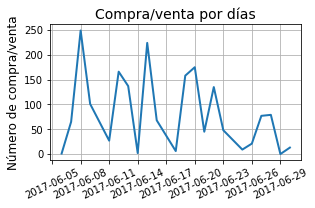

In [39]:
plt.figure(figsize=(4.5,2.5))
plt.title('Compra/venta por días',size=14)
plt.ylabel('Número de compra/venta', size=12)
plt.plot(D_1.index,D_1.buy,linewidth=2)
plt.grid()
plt.xticks(rotation=25);
plt.savefig('figure13-A_1.png',bbox_inches='tight');

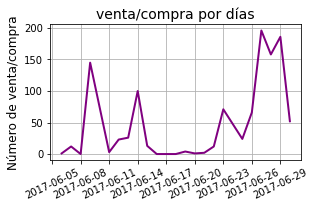

In [40]:
plt.figure(figsize=(4.5,2.5))
plt.title('venta/compra por días',size=14)
plt.ylabel('Número de venta/compra', size=12)
plt.plot(D_1.index,D_1.sell,linewidth=2, color='purple')
plt.grid()
plt.xticks(rotation=25);
plt.savefig('figure13-A_2.png',bbox_inches='tight')

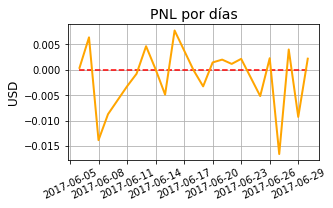

In [41]:
plt.figure(figsize=(4.5,2.5))
plt.title('PNL por días',size=14)
plt.ylabel('USD', size=12)
plt.plot(D_1.index,np.zeros(len(D_1.PNL)),linewidth=1.5, color='red', linestyle='--')
plt.plot(D_1.index,D_1.PNL,linewidth=2, color='orange')
plt.grid()
plt.xticks(rotation=25);
plt.savefig('figure13-A_3.png',bbox_inches='tight')

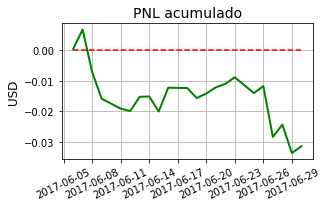

In [42]:
PNL_accu_D1 = []
count_D1 = 0
for i in D_1.PNL:
    count_D1 += i
    PNL_accu_D1.append(count_D1)
    
plt.figure(figsize=(4.5,2.5))
plt.title('PNL acumulado',size=14)
plt.ylabel('USD', size=12)
plt.plot(D_1.index,np.zeros(len(D_1.PNL)),linewidth=1.5, color='red', linestyle='--')
plt.plot(D_1.index,PNL_accu_D1,linewidth=2, color='green')
plt.grid()
plt.xticks(rotation=25);
plt.savefig('figure13-A_4.png',bbox_inches='tight')

#### Diseño B

In [43]:
D_2 = pd.read_csv('../TrueFX EUR vs USD/RNN/resultados/result_3.csv',index_col=0, infer_datetime_format=True,
                 parse_dates=True)
D_2.head()

,PNL,buy,sell,longest_buy,longest_sell,accuracy 1,accuracy 0,accuracy 3,accuracy 2,acuracy_total
2017-06-06,0.000000,0.0,0.0,0.0,281.0,0.000000,0.000000,0.000000,1.000000,0.145907
2017-06-07,0.006134,116.0,0.0,44.0,84.0,0.500000,0.000000,0.325000,0.365854,0.293907
2017-06-08,-0.014580,269.0,0.0,184.0,9.0,0.972477,0.000000,0.000000,0.071429,0.381625
2017-06-09,-0.003307,207.0,33.0,35.0,5.0,0.861702,0.119048,0.000000,0.000000,0.369919
2017-06-11,-0.002754,20.0,0.0,5.0,2.0,0.600000,0.000000,0.545455,0.000000,0.264706


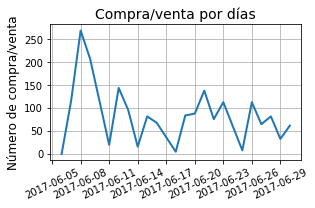

In [44]:
plt.figure(figsize=(4.5,2.5))
plt.title('Compra/venta por días',size=14)
plt.ylabel('Número de compra/venta', size=12)
plt.plot(D_2.index,D_2.buy,linewidth=2)
plt.grid()
plt.xticks(rotation=25);
plt.savefig('figure13-B_1.png',bbox_inches='tight')

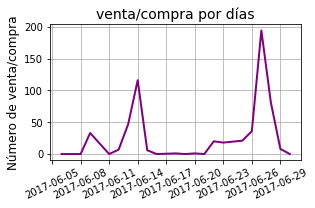

In [45]:
plt.figure(figsize=(4.5,2.5))
plt.title('venta/compra por días',size=14)
plt.ylabel('Número de venta/compra', size=12)
plt.plot(D_2.index,D_2.sell,linewidth=2, color='purple')
plt.grid()
plt.xticks(rotation=25);
plt.savefig('figure13-B_2.png',bbox_inches='tight')

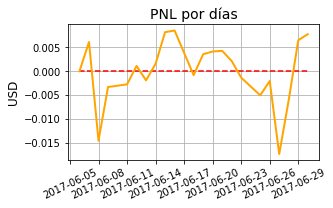

In [46]:
plt.figure(figsize=(4.5,2.5))
plt.title('PNL por días',size=14)
plt.ylabel('USD', size=12)
plt.plot(D_2.index,np.zeros(len(D_2.PNL)),linewidth=1.5, color='red', linestyle='--')
plt.plot(D_2.index,D_2.PNL,linewidth=2, color='orange')
plt.grid()
plt.xticks(rotation=25);
plt.savefig('figure13-B_3.png',bbox_inches='tight')

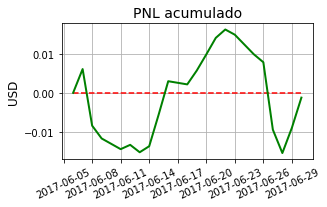

In [47]:
PNL_accu_D2 = []
count_D2 = 0
for i in D_2.PNL:
    count_D2 += i
    PNL_accu_D2.append(count_D2)
    
plt.figure(figsize=(4.5,2.5))
plt.title('PNL acumulado',size=14)
plt.ylabel('USD', size=12)
plt.plot(D_2.index,np.zeros(len(D_2.PNL)),linewidth=1.5, color='red', linestyle='--')
plt.plot(D_2.index,PNL_accu_D2,linewidth=2, color='green')
plt.grid()
plt.xticks(rotation=25);
plt.savefig('figure13-B_4.png',bbox_inches='tight')

### Diseño C

In [48]:
D_3 = pd.read_csv('../TrueFX EUR vs USD/RNN/resultados/result_6.csv',index_col=0, infer_datetime_format=True,
                 parse_dates=True)
D_3.head()

,PNL,buy,sell,longest_buy,longest_sell,accuracy 1,accuracy 0,accuracy 3,accuracy 2,acuracy_total
2017-06-06,0.000000,0.0,0.0,0.0,281.0,0.000000,0.000000,0.500000,0.341463,0.113879
2017-06-07,0.007282,82.0,0.0,44.0,85.0,0.370370,0.000000,0.175000,0.609756,0.258065
2017-06-08,-0.011908,222.0,35.0,32.0,7.0,0.816514,0.117647,0.185185,0.035714,0.385159
2017-06-09,-0.009712,20.0,214.0,3.0,57.0,0.063830,0.785714,0.066667,0.000000,0.300813
2017-06-11,-0.004029,29.0,1.0,15.0,2.0,0.800000,0.000000,0.272727,0.000000,0.205882


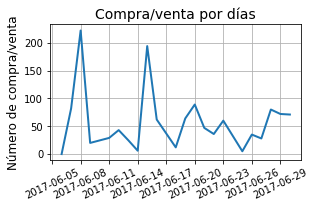

In [49]:
plt.figure(figsize=(4.5,2.5))
plt.title('Compra/venta por días',size=14)
plt.ylabel('Número de compra/venta', size=12)
plt.plot(D_3.index,D_3.buy,linewidth=2)
plt.grid()
plt.xticks(rotation=25);
plt.savefig('figure13-C_1.png',bbox_inches='tight')

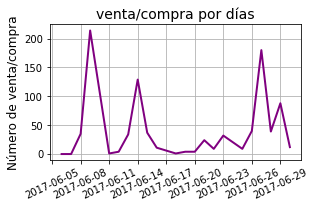

In [50]:
plt.figure(figsize=(4.5,2.5))
plt.title('venta/compra por días',size=14)
plt.ylabel('Número de venta/compra', size=12)
plt.plot(D_3.index,D_3.sell,linewidth=2, color='purple')
plt.grid()
plt.xticks(rotation=25);
plt.savefig('figure13-C_2.png',bbox_inches='tight')

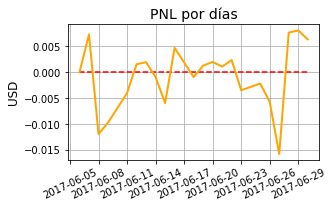

In [51]:
plt.figure(figsize=(4.5,2.5))
plt.title('PNL por días',size=14)
plt.ylabel('USD', size=12)
plt.plot(D_3.index,np.zeros(len(D_3.PNL)),linewidth=1.5, color='red', linestyle='--')
plt.plot(D_3.index,D_3.PNL,linewidth=2, color='orange')
plt.grid()
plt.xticks(rotation=25);
plt.savefig('figure13-C_3.png',bbox_inches='tight')

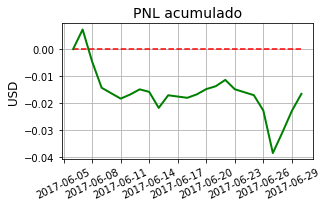

In [52]:
PNL_accu_D3 = []
count_D3 = 0
for i in D_3.PNL:
    count_D3 += i
    PNL_accu_D3.append(count_D3)
    
plt.figure(figsize=(4.5,2.5))
plt.title('PNL acumulado',size=14)
plt.ylabel('USD', size=12)
plt.plot(D_3.index,np.zeros(len(D_3.PNL)),linewidth=1.5, color='red', linestyle='--')
plt.plot(D_3.index,PNL_accu_D3,linewidth=2, color='green')
plt.grid()
plt.xticks(rotation=25);
plt.savefig('figure13-C_4.png',bbox_inches='tight')

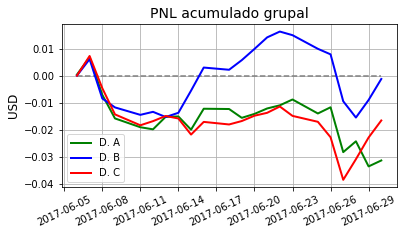

In [53]:
plt.figure(figsize=(6,3))
plt.title('PNL acumulado grupal',size=14)
plt.ylabel('USD', size=12)
plt.plot(D_1.index,np.zeros(len(D_1.PNL)),linewidth=1.5, color='grey', linestyle='--')
plt.plot(D_1.index,PNL_accu_D1,linewidth=2, color='green', label='D. A')
plt.plot(D_2.index,PNL_accu_D2,linewidth=2, color='blue', label='D. B')
plt.plot(D_3.index,PNL_accu_D3,linewidth=2, color='red', label='D. C')
plt.grid()
plt.legend()
plt.xticks(rotation=25);
plt.savefig('figure13-grupal.png',bbox_inches='tight')

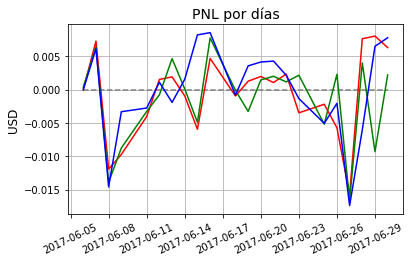

In [54]:
plt.figure(figsize=(6,3.5))
plt.title('PNL por días',size=14)
plt.ylabel('USD', size=12)
plt.plot(D_3.index,np.zeros(len(D_3.PNL)),linewidth=1.5, color='grey', linestyle='--')
plt.plot(D_3.index,D_3.PNL,linewidth=1.5, color='red')
plt.plot(D_1.index,D_1.PNL,linewidth=1.5, color='green')
plt.plot(D_2.index,D_2.PNL,linewidth=1.5, color='blue')
plt.grid()
plt.xticks(rotation=25);

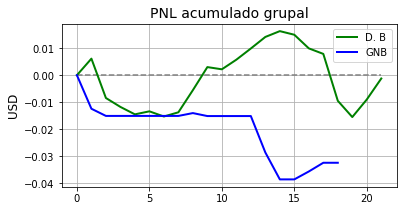

In [55]:
plt.figure(figsize=(6,3))
plt.title('PNL acumulado grupal',size=14)
plt.ylabel('USD', size=12)
x = range(len(D_1.index))
plt.plot(x,np.zeros(len(D_1.PNL)),linewidth=1.5, color='grey', linestyle='--')
plt.plot(x,PNL_accu_D2,linewidth=2, color='green', label='D. B')
plt.plot(range(r_GNB.shape[0]),PNL_accu_GNB,linewidth=2, color='blue', label='GNB')
plt.legend()
plt.grid();

In [ ]:
r_GNB.shape

In [ ]:
D_2.shape[0], len(PNL_accu_D2)

In [ ]:
plt.figure(figsize=(7,4))
plt.title('PNL acumulado grupal',size=14)
plt.ylabel('USD', size=12)
plt.plot(range(D_2.shape[0]),np.zeros(len(D_1.PNL)),linewidth=1.5, color='red', linestyle='--')
plt.plot(range(r_GNB.shape[0]),PNL_accu_GNB,linewidth=2, color='green', label='GNB')
plt.plot(range(D_2.shape[0]),PNL_accu_D2,linewidth=2, color='blue', label='D. B')
plt.grid()
plt.legend();
#plt.xticks(rotation=60);
plt.savefig('figure14-grupal_1.png')

In [ ]:
plt.figure(figsize=(6,3))
plt.title('PNL acumulado grupal',size=14)
plt.ylabel('USD', size=12)
plt.plot(range(D_2.shape[0]),np.zeros(len(D_1.PNL)),linewidth=1.5, color='red', linestyle='--')
plt.plot(range(r_GNB.shape[0]),r_GNB.PNL,linewidth=2, color='green', label='GNB')
plt.plot(range(D_2.shape[0]),D_2.PNL,linewidth=2, color='blue', label='D. B')
plt.grid()
plt.legend();
#plt.xticks(rotation=60);
plt.savefig('figure14-grupal_2.png')

In [ ]:
|aa

In [ ]:
np.mean(r_GNB.PNL)

In [ ]:
S = S.drop('ref', axis=1)
S = S.dropna()

In [ ]:
S.head()

In [ ]:
S.shape

In [ ]:
plt.figure(figsize=(7,3))
plt.grid()
plt.ylabel('EUR/USD')
plt.plot(S.index,S.bid,color='blue',alpha=0.7, linewidth=1, label='Bid')
#plt.plot(S.index,S.ask,color='red',alpha=0.7, linewidth=1, label='Ask')
plt.legend();
plt.savefig('figure1-1.png')

In [ ]:
S = S.groupby(S.index).first()

In [ ]:
S = S.resample('5T',loffset='5T').last().dropna()

In [ ]:
S.shape

In [ ]:
plt.figure(figsize=(7,3))
plt.grid()
plt.ylabel('EUR/USD')
plt.plot(S.index,S.bid,color='blue',alpha=0.7, linewidth=1, label='Bid')
#plt.plot(S.index,S.ask,color='red',alpha=0.7, linewidth=1, label='Ask')
plt.legend();
plt.savefig('figure1-2.png')

In [ ]:
S.shape

In [ ]:
100 - (6360/3952896)*100

In [ ]:
5*12*24*20

#### Para sacar la figura 2

In [ ]:
plt.figure(figsize=(5,3))
plt.grid()
plt.ylabel('EUR/USD')
plt.xlabel('time')
plt.plot(range(len(S.index[:10])),S.bid[:10],color='blue',alpha=0.7, linewidth=2, label='Bid')
plt.legend();
plt.savefig('figure2-1.png')

In [ ]:
plt.figure(figsize=(5,3))
plt.grid()
plt.ylabel('EUR/USD')
plt.xlabel('time')
plt.plot(range(len(S.index[:9])),S.bid[:9],color='blue',alpha=0.7, linewidth=2, label='window')
plt.plot(range(len(S.index[:10])),list(np.zeros(8)*np.nan) + list([S.bid[8],S.bid[9]]),color='orange',alpha=1, linewidth=2, label='target')
plt.legend();
plt.savefig('figure2-2.png')

In [ ]:
x_prom = np.mean(S.bid[:9])

In [ ]:
plt.figure(figsize=(5,3))
plt.grid()
plt.ylabel('EUR/USD')
plt.xlabel('time')
plt.scatter(range(len(S.index[:9])),S.bid[:9],color='blue',alpha=0.7, linewidth=2, label='window')
plt.scatter(range(len(S.index[:10])),list(np.zeros(9)*np.nan) + list([S.bid[9]]),
         color='orange',alpha=1, linewidth=2, label='target')

plt.scatter(range(len(S.index[:9])),list(np.zeros(8)*np.nan) + list([x_prom]),
         color='red',alpha=.7, linewidth=2, label='X mean')

plt.ylim(1.2,1.203)
plt.legend();
plt.savefig('figure3-2.png')

#### Para el OHLC

In [ ]:
o = 1.2017
h = 1.202
l = 1.2003
c = S.bid[9]

In [ ]:
o, h, l, c

In [ ]:
plt.figure(figsize=(5,3))
plt.grid()
plt.ylabel('EUR/USD')
plt.xlabel('time')
plt.scatter(range(len(S.index[:9])),S.bid[:9],color='blue',alpha=0.7, linewidth=2, label='window')
plt.scatter(range(len(S.index[:10])),list(np.zeros(9)*np.nan) + list([S.bid[9]]),
         color='orange',alpha=1, linewidth=2, label='target')

plt.scatter(range(len(S.index[:9])),list(np.zeros(8)*np.nan) + list([x_prom]),
         color='red',alpha=.7, linewidth=2, label='X mean')

plt.scatter(range(len(S.index[:9])),list(np.zeros(8)*np.nan) + list([o]),
         color='green',alpha=.7, linewidth=2, label='open')

plt.scatter(range(len(S.index[:9])),list(np.zeros(8)*np.nan) + list([h]),
         color='brown',alpha=.7, linewidth=2, label='high')

plt.scatter(range(len(S.index[:9])),list(np.zeros(8)*np.nan) + list([l]),
         color='black',alpha=.7, linewidth=2, label='low')

plt.ylim(1.2,1.203)
plt.legend();
plt.savefig('figure3-4.png')